# Tugas Besar: Deteksi Covid-19 pada Gambar CXR

## Motivation

### Problem
Penanganan Covid-19 sampai saat ini masih sangat bergantung pada metode PCR (Polymerase Chain Reaction) untuk mendeteksi adanya virus Sars-Cov-2 pada manusia. Metode PCR ini sudah teruji mampu memberikan hasil yang paling baik dibandingkan dengan metode-metode lainnya. Namun metode ini juga memiliki kelemahan karena prosesnya yang cukup lama, yaitu butuh 3-7 hari hingga hasil tes keluar. Padahal seseorang yang telah terinfeksi Covid-19 sangat berpotensi menularkan virus ini ke orang lain, tenaga medis sangat butuh untuk memberikan keputusan diagnosa dalam waktu cepat. Selain itu telah terbukti adanya false negative pada metode PCR yang terjadi saat PCR digunakan pada tahap awal infeksi. Perilaku dari virus Sars-Cov-2 yang masih baru ini masih menimbulkan banyak tanda tanya. Metode penanganan yang sepenuhnya berfungsi ternyata masih memiliki kelemahan, karena itu dibutuhkan metode-metode lain yang sifatnya komplementer sehingga dapat mengurangi kemunculan false negative sebanyak-banyaknya.

Covid-19 pada dasarnya adalah salah satu jenis Pneumonia. Pneumonia merupakan infeksi yang menyebabkan peradangan pada kantong udara (alveoli) di paru-paru, sehingga kantong udara terisi oleh cairan dan menyebabkan penderitanya mengalami sesak nafas. Pneumonia bisa disebabkan oleh bakteri, jamur, atau virus yang salah satunya adalah virus Sars-Cov-2. Gambar radiologi (x-ray scan dan ct scan) sudah umum digunakan untuk mendeteksi adanya pneumonia dengan mengamati tanda-tanda pada tampakan radiologis yang disebut dengan infiltrasi/opasiti/konsolidasi. Saat ini pemeriksaan radiologi sudah dijadikan standar untuk memeriksa pasien Covid-19, sebagai komplemen dari PCR dan pemeriksaan klinis lainnya. Pemeriksaan dengan radiologi relatif lebih cepat dari PCR, hasil pemeriksaan bisa didapat dalam waktu 1 hari. Namun sama seperti pengetesan lainnya, metode ini juga memiliki false positive. Terlebih lagi, pembacaan gambar radiologi bersifat operator-dependent, yang artinya setiap dokter spesialis radiologi bisa memberikan rekomendasi diagnosa yang berbeda.

### Solution
Deep Learning untuk klasifikasi Pneumonia (Covid-19) pada gambar radiologi dengan mencari tanda kemunculan infiltrat/opasiti/konsolidasi.

![alt text](https://drive.google.com/uc?id=1kQOINj0U8NY1BNqhSWQU9xqtvLSgYTji)



## **DISCLAIMER**

MODEL AI INI TIDAK DITUJUKAN UNTUK MENJADI SOLUSI ATAS PERMASALAHAN COVID-19 YANG SEDANG TERJADI. YANG TERCANTUM DI SINI DAN YANG ANDA KERJAKAN SELURUHNYA BERADA DALAM KONTEKS KEPENTINGAN AKADEMIK UNTUK MEMAHAMI CARA KERJA SISTEM BERBASIS PEMBELAJARAN MESIN.

Pemanfaatan AI di bidang medis membutuhkan studi yang mendalam dan penuh kehati-hatian, pengembangannya melibatkan pakar-pakar di bidang AI, medis, dan lain-lain. Pada praktiknya, penggunaan AI di bidang medis dibatasi hanya sebagai alat bantu pemeriksaan dan pemberi rekomendasi, bukan alat penentu diagnosis. Keputusan terkait diagnosis terhadap pasien sepenuhnya adalah wewenang tenaga medis yang bersangkutan, sesuai dengan hukum yang berlaku.

## Instruksi Tugas Besar
Didalam notebook ini, seluruh script sudah disediakan sehingga Anda tidak perlu lagi mengerjakan bagian script yang kosong. Sebagai gantinya, anda diminta untuk menjalankan program untuk melakukan training model menggunakan **dataset baru** yang diberikan, melakukan evaluasi, dan membandingkan performa model baru dengan performa model awal. Selama pengerjaan Anda akan diberi petunjuk terkait alur dan instruksi pengerjaan. Oleh karena itu, perhatikan istruksi dengan baik.

>**Note:** Setelah Anda menyelesaikan tugas besar ini, Anda diminta untuk mengumpulkan tugas besar ini dalam bentuk HTML. Sebelum diubah menjadi HTML, semua script harus dipastikan sudah di-run agar penilai dapat melihat hasil dari kode yang dijalankan. Anda dapat mengubah notebook ini menjadi HTML dengan **File -> Download as -> HTML(.html)**. Sertakan file HTML tersebut bersama folder tugas besar ini.

Selain mengimplementasikan bagian script yang kosong, Anda juga diminta menjawab pertanyaan analisis. Pertanyaan tersebut ditandai dengan tulisan **'Pertanyaan X'**. Baca dengan baik pertanyaan tersebut dan berikan jawaban anda secara jelas di bagian dengan tulisan **Jawaban**. Tugas besar Anda akan dinilai berdasarkan 
kode implementasi dan juga jawaban analisis setiap pertanyaan.

>**Note:** Sel Code dan Markdown dapat dieksekusi dengan **Shift+Enter** di keyboard. Sel Markdown dapat di-edit dengan mengklik dua kali sel tersebut.

Bagian yang diberi tanda **_opsional_** merupakan tugas yang diberikan jika Anda ingin mendapatkan nilai lebih dari standar minimum.

## Alur Tugas Besar

1. Notebook Setting
2. Environment Setting
3. Dataset Preparation
4. Label Separation
5. Label One-Hot-Encoding
6. Model Definition
7. Hyperparameters
8. Optimizer and Loss Function
9. Model Training
10. Model Evaluation
11. Implementasi Model

## Kelompok yang mengerjakan

**Kelompok:** 5

**Anggota Kelompok:**


1.   Naila Fadhilah F. | 13216002
2.   Maurizfa          |     13216008
3.   M. Naufal Thariq   |    13216010
4.   Mikael Wahyu D.     |   13216014  
5.   Robertsen Putra S.   |  13216024
6.   Gabrielle Shay A.    |  13216080
7.   Nicholas Nathanael   |  13216093
8.   Resfyanti N. A.      |  18317016

#***PERHATIAN :**

Apabila ingin mengetes saja modelnya atau mau nyobain CAM. JANGAN DIBUAT LAGI MODELNYA. 

Berikut stepnya :

1. Run dari bagian 1 sampai bagian 5
2. Loncat ke bagian LOAD MODEL dan run kebawah (biarkan bagian 6-10 nya).

## 1. Notebook Setting


GPU dibutuhkan karena komputasi yang akan dilakukan cukup besar. Pemrosesan menggunakan CPU akan menghabiskan waktu yang sangat lama.

In [0]:
# Check for listed GPU

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7534362361158328386
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13280426927219293803
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6691247228165775465
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150726272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10029887196885797483
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
# Check for selected GPU

!nvidia-smi 

Tue May 19 14:05:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    54W / 149W |    130MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# Mount google drive to our notebook

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
# Check for tensorflow version

import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# In case you want to check all variabels
%whos

Variable     Type      Data/Info
--------------------------------
device_lib   module    <module 'tensorflow.pytho<...>on/client/device_lib.py'>
drive        module    <module 'google.colab.dri<...>s/google/colab/drive.py'>
tf           module    <module 'tensorflow' from<...>/tensorflow/__init__.py'>


## 2. Environment Setting

Melakukan import library yang digunakan. Untuk jawaban tugas besar, import library akan dilakukan terpisah dari sel ini untuk mempermudah debugging selanjutnya.

In [0]:
# import dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from keras.preprocessing.image import img_to_array
from imutils import paths
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Datasets Preparation

Dataset sample yang diberikan sudah terbagi ke dalam 2 folder normal dan covid, masing-masing folder berisi 25 data gambar. Data ini sangat sedikit, tidak bisa merepresentasi kasus yang sebenarnya. Pada praktiknya, data yang dibutuhkan jumlahnya ribuan hingga puluhan ribu untuk masing-masing kelas.

In [0]:
# initialize path and name for datasets, plot image, and model
dataset = "/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/"     # Digunakan dataset baru yang terdapat pada folder NEW DATASET_2
plot_name = "plot.png"
model_name = "covid19.model"

# initialize data(image) and label from dataset directory
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset))
data = []
labels = []

[INFO] loading images...


In [0]:
print(imagePaths)

['/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (35).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (34).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid_2 (5).png', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (31).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (29).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (28).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (25).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (24).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (23).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (21).jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/NEW DATASET_2/covid/covid (20).jpeg', '/content

## 4. Label Separation

Untuk setiap gambar, dibuat label yang sesuai dengan kelasnya. Pemberian label dilakukan dengan membaca parent folder dari setiap gambar. Di akhir proses, semua data diubah bentuknya ke dalam NumPy array. Kemudian data dinormalisasi sehingga nilai pixelnya berada di antara 0 dan 1.

In [0]:
# loop over the image paths, extract data and label, and preprocess image
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	data.append(image)
	labels.append(label)
 
# convert to NumPy arrays and normalize to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [0]:
# just a sanity check, as usual

print(len(data))
print(data.shape)
print(len(labels))
print(labels.shape)
#print(data)
#print(labels)

266
(266, 224, 224, 3)
266
(266,)


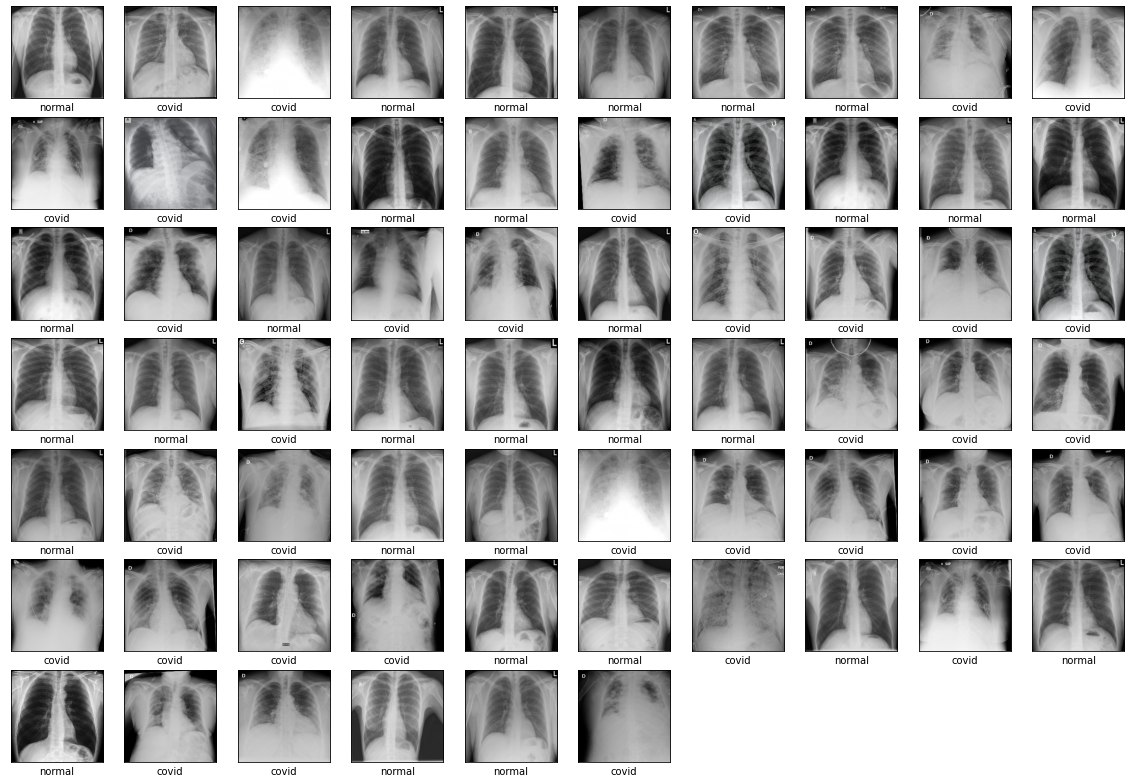

In [0]:
# Plot random Images
plt.figure(figsize=(20,20))
for i in range(66):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    num = random.randint(0,265)
    plt.grid(False)
    plt.imshow(data[num], cmap="Greys")
    plt.xlabel(labels[num])
plt.show()

## 5. One-hot Encoding and Data Augmentation

Dalam keras, data label perlu diolah menjadi matriks yang tiap baris berupa vektor nilai nol atau satu. Data label tersebut perlu dioleh dengan metode One-Hot-Encoding.

Proses selanjutnya adalah data augmentasi.


**Pertanyaan 1**: Apa itu data augmentasi dan apa pengaruhnya pada performa model? Jelaskan juga mengapa data augmentation pada poin 9 hanya dilakukan untuk data train?

**Jawaban:** 

Augmentasi data adalah sebuah teknik untuk "memperbanyak" jumlah data training dari sumber data yang awalnya kita miliki. Teknik ini pada dasarnya hanya memodifikasi gambar yang ada, seperti pencerminan atau rotasi. Augmentasi juga membantu model mengenali gambar/data yang kita berikan dari berbagai posisi/sudut pandang, terutama ketika jumlah data yang kita miliki terbatas dan variasinya sedikit. 

Pengaruh akan sangat jelas terlihat apabila dataset yang dimiliki hanya menunjukkan suatu posisi tertentu. Kita andaikan dataset yang ada hanya menunjukkan kontaminan di sisi kanan paru-paru, sedangkan kenyataannya kontaminan tersebut bisa berada di area manapun di paru-paru. Tanpa melakukan augmentasi data, model dapat menyimpulkan bahwa kasus COVID-19 hanya terjadi jika ditemukan kontaminan atau konsentrasi warna pada bagian kanan paru-paru dalam hasil X-Ray pasien. Dengan augmentasi, misalnya kita lakukan pencerminan sehingga kontaminan berada di sisi kiri paru-paru, model akan menganggap konsentrasi warna di kiri atau kanan paru-paru pasien pada hasil X-Ray mengindikasikan kasus COVID-19. Contoh tersebut tidak menjadikan model mampu menyimpulkan seluruh kemungkinan letak konsentrasi warna, tetapi sudah memberikan tambahan satu kemungkinan. Augmentasi dapat dilakukan dengan berbagai cara untuk menambah kemungkinan yang lain.

Tujuan dari augmentasi data adalah memberikan berbagai kemungkinan kondisi nyata dari sedikit data yang tersedia untuk melatih model. Karena data yang diambil untuk melakukan hal tersebut berasal dari *data train*, bagian data itulah yang diaugmentasi.


---




In [0]:
# one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# split dataset to train and test data
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.2, stratify=labels, random_state=42)

# initialize data augmentation ( To Replace Training Data with some rotate images)
# trainAug = ImageDataGenerator(
# 	rotation_range=15,
# 	fill_mode="nearest")
trainAug = ImageDataGenerator(width_shift_range=2, height_shift_range=2, fill_mode="nearest")

In [0]:
# sanity check, again (Check 10 random labels)
for i in range(10):
  num = random.randint(0,265)
  print(labels[num])

[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]


**JIKA TIDAK INGIN MEMBUAT MODEL DARI AWAL. SKIP BAGIAN 6-10, dan LANGSUNG LOAD MODEL SAJA.**

## 6. Model Definition

Arsitektur yang digunakan pada tugas ini adalah VGG16 dengan menggunakan pretrained model yang sudah ditraining menggunakan dataset Imagenet. Ini adalah metode yang dinamakan transfer learning, menggunakan pengetahuan yang telah didapat dari model lain untuk memperkuat model yang baru.

In [0]:
# load the VGG16 pretrained model
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the new head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the new head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

# freeze the base model
for layer in baseModel.layers:
	layer.trainable = False

In [0]:
model.summary()

Model: "model_294"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0 

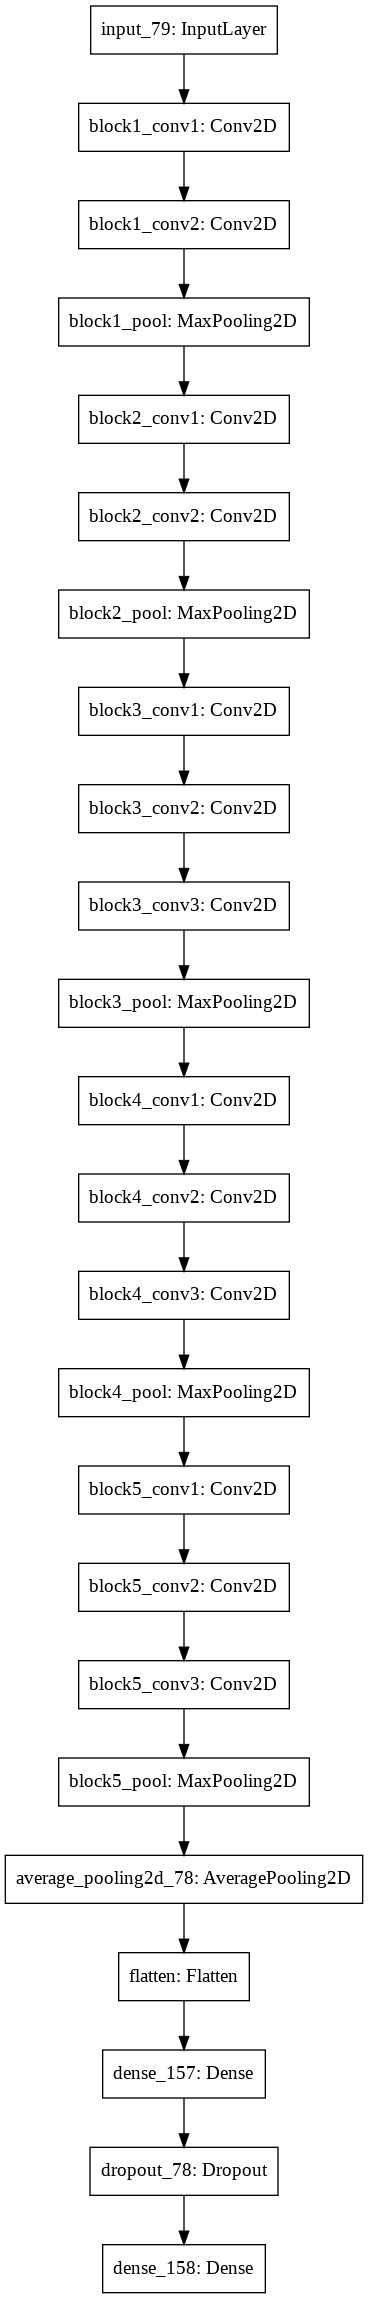

In [0]:
# Plot of the layers of COVID-19 model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='covidmodel.png')


## 7. Hyperparameter


Hyperparameters merupakan nilai-nilai yang perlu ditentukan agar kita dapat memeroleh hasil training yang baik. Dalam hal ini, perlu ditentukan nilai learning rate, ukuran batch dan jumlah iterasi epoch. Anda tidak diwajibkan melakukan fine tuning terhadap hyperparameter ini, namun memilih hyperparameter yang lebih baik dapat meningkatkan performa model dengan signifikan.

In [0]:
# initialize learning rate, epochs, and batch size
# (This value are from the result of optimization using GridSearchCV )
INIT_LR = 0.008
EPOCHS = 12
BS = 7

## 8. Optimizer and Loss Function

Optimizer merupakan opsi yang juga perlu diperhatikan, pilihan optimizer dalam Keras dapat dilihat [keras-optimizers](https://keras.io/optimizers/). Selain itu, loss function juga perlu dipilih yang disesuaikan dengan jenis data yang digunakan. Dalam Keras jenis-jenis loss function dapat dilihat di [keras-losses](https://keras.io/losses/).

**Pertanyaan 2**: Optimizer di sini menggunakan ADAM, apa bedanya ADAM dengan GD yang sudah dipelajari di kelas? Apakah ada baiknya kita mengganti optimizer ini dengan optimizer yang lain?

**Jawaban:**

Adam berasal dari Adaptive Moment Estimation, yang seperti namanya merupakan teknik optimasi yang beradaptasi. Pada Adam, adaptasi terjadi pada learning rate saat training untuk penghitungan gradien yang berbeda. Adaptasi learning rate inilah yang menjadi perbedaan mendasar antara Adam dan Gradient Descent karena GD tidak melakukannya. Adaptasi ini mempercepat model mencapai konvergen yang berarti waktu untuk komputasi lebih singkat dan memori yang digunakan lebih kecil.

Adam merupakan optimizer yang cocok digunakan untuk model untuk komputasi dengan jumlah data atau parameter yang besar. Optimizer ini juga efektif untuk kasus dengan hasil gradien yang sangat berderau (noisy) atau terpecah-pecah (Kingma & Ba, "*Adam: A Method for Stochastic Optimization*", dikutip dari machinelearningmastery.com)

Di dalam hasil penelitian Kingma dan Ba juga dilakukan training pada algoritma regresi linear pada dataset analisis *MNIST digit recognition* dan *IMDB sentiment*. Dari percobaan tersebut didapatkan bahwa *training cost* model yang menggunakan optimizer Adam paling kecil dibandingkan dengan 4 optimizer lain (AdaDelta, SGDNesterov, RMSProp, AdaGrad). Di dalam hasil penelitian lain oleh Sebastian Ruder, *"An Overview of Gradient Descent Optimization Algorithm"*, menyebutkan bahwa Adam secara keseluruhan merupakan pilihan terbaik.

> ![Comparison of Training Cost Using 5 Different Optimizers](https://drive.google.com/uc?id=1jxeDqRb2XVlY-Vx1MB3237cpmSq_r4DF)

Jadi dapat disimpulkan Adam adalah pilihan terbaik saat ini sebagai optimizer yang efisien dan cocok untuk jumlah data besar.

---




In [0]:
# compile model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


## 9. Model Training

Pada tahap ini. kita menggabungkan semua data dan parameter yang telah didefiniska di atas, kemudian melakukan training model.

In [0]:
# train model
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/12
30/30 [==============================] - 4s 148ms/step - loss: 0.8888 - accuracy: 0.6429 - val_loss: 0.3496 - val_accuracy: 0.8519
Epoch 2/12
30/30 [==============================] - 4s 138ms/step - loss: 0.3826 - accuracy: 0.8390 - val_loss: 0.2452 - val_accuracy: 0.9444
Epoch 3/12
30/30 [==============================] - 4s 136ms/step - loss: 0.2905 - accuracy: 0.8927 - val_loss: 0.2217 - val_accuracy: 0.9444
Epoch 4/12
30/30 [==============================] - 4s 136ms/step - loss: 0.2270 - accuracy: 0.9122 - val_loss: 0.1528 - val_accuracy: 0.9630
Epoch 5/12
30/30 [==============================] - 4s 137ms/step - loss: 0.2726 - accuracy: 0.8976 - val_loss: 0.2999 - val_accuracy: 0.8519
Epoch 6/12
30/30 [==============================] - 4s 137ms/step - loss: 0.1924 - accuracy: 0.9366 - val_loss: 0.2355 - val_accuracy: 0.9074
Epoch 7/12
30/30 [==============================] - 4s 137ms/step - loss: 0.1642 - accuracy: 0.9366 - val_loss: 0.1067 - val

In [0]:
!nvidia-smi

Tue May 19 15:43:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    61W / 149W |   8423MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 10. Model Evaluation

**Pertanyaan 3**: Jelaskan penggunaan keempat metric di atas untuk mengukur performa model ini. Apakah keempat metric tersebut sudah representatif? Adakah metode lain yang lebih baik?

**Jawaban**:

Secara ringkas, confusion matrix mengelompokkan hasil prediksi model dan mencocokkannya dengan kelas data yang sesungguhnya. Di dalam model ini terdapat dua kelas yaitu *covid* dan *normal*, sehingga terbentuk tabel dengan 2 baris, 2 kolom, 4 klasifikasi seperti pada gambar di bawah ini.

> ![alt text](https://drive.google.com/uc?id=1hjqz0zmTjRLb-nRVe-QoMs48G1SSUqoL)

> True Positive = jumlah data dalam kelas Positive yang diprediksi model sebagai Positive.

> False Positive = jumlah data dalam kelas Negative yang diprediksi model sebagai Positive.

> False Negative = jumlah data dalam kelas Positive yang diprediksi model sebagai Negative.

> True Negative = jumlah data dalam kelas Negative yang diprediksi model sebagai Positive.

Accuracy, sensitivity, dan specificity menunjukkan performa model dalam melakukan prediksi. Accuracy menunjukkan berapa banyak klasifikasi yang tepat dilakukan oleh model dari seluruh hasil prediksi, sensitivity menunjukkan berapa banyak data dalam kelas Positive diprediksi ke dalam kelas Positive, dan specificity melakukan sebaliknya yaitu berapa banyak data dalam kelas Negative diprediksi ke dalam kelas Negative.

Pada permasalahan kali ini, kita ingin model mengklasifikasikan data ke dalam kelas *covid* dan *normal* seperti yang telah disebutkan sebelumnya, dan kita misalnya *covid* adalah kelas Positive. Meski tujuan utama kita adalah akurasi mendekati 100% dalam klasifikasi kelas apapun, dalam hal ini kita lebih memilih adanya data normal yang diprediksi sebagai *covid* (False Positive) daripada sebaliknya (False Negative) yang dapat berakibat pada kasus *covid* tidak terdeteksi. Oleh karena itu, hasil yang diinginkan adalah jumlah False Negative semakin kecil. Pengurangan jumlah False Negative ini dapat dilihat dengan naiknya **Sensitivity** atau **Negative Predictive Value** karena keduanya menggunakan variabel False Negative (selain pengamatan Accuracy yang juga digunakan).

Ada metode lain untuk mengevaluasi classifier yaitu kurva ROC (Reciever Operating Characteristics) bersama dengan AUC (Area Under the Curve). Metode ini melakukan plot **True Positive Rate/Sensitivity** terhadap **False Positive Rate/(1-Specificity)** seperti pada grafik contoh di bawah ini.

> ![alt text](https://drive.google.com/uc?id=1TpZcjY16IoBS6gZ2l852pT5mxJNWwEsU)

Kurva ROC membentuk plot nilai-nilai threshold model dengan kemungkinan hasil TPR dan FPR masing-masing. Garis biru pada grafik menunjukkan ROC pada model tanpa skill, atau model yang mengambil kesimpulan random untuk setiap data dengan jumlah data pada kelas masing-masing sama. Garis jingga menunjukkan ROC model pada contoh, dengan performa klasifikasi sekitar 80%. AUC merupakan persentase area di bawah kurva ROC model dari area keseluruhan grafik. Semakin besar persentasi AUC, semakin tinggi performa model yang dievaluasi. Meskipun kita tidak dapat melihat langsung nilai threshold pada kurva, metode ROC tidak mengharuskan kita mencoba-coba nilai threshold untuk melakukan evaluasi performa, tidak seperti dengan metode Confusion Matrix.

> ![alt text](https://drive.google.com/uc?id=1uqnxwFx4ssb7cMyV4QkKBtxaZ5hl3N4I)
![alt text](https://drive.google.com/uc?id=1xGkdHjK5PflcqZW3ou_lsJkjKxFidSjr)

Kekurangan ROC dibandingkan dengan Confusion Matrix adalah ROC hanya dapat digunakan untuk model dengan dua kelas, yang sebenarnya sudah memadai untuk kasus model COVID-19.

Namun mempertimbangkan kebutuhan model permasalahan COVID-19 kali ini untuk mencapai tingkat Sensitivity tertentu, tidak perlu dibuat plot untuk berbagai nilai yang mungkin terjadi. Justru dengan Confusion Matrix dapat digunakan sebuah threshold tertentu untuk menguji model hingga diperoleh tingkat performa yang diinginkan. Oleh karena itu, Confusion Matrix adalah metode evaluasi yang cocok kali ini, dengan metric Accuracy, Sensitivity, dan Specificity sudah memenuhi kriteria evaluasi.

---





Berikut adalah script yang dapat digunakan untuk menguji model dengan dataset test. Dilakukan perhitungan berupa Confusion Matrix, Accuracy, Sensivity, dan Specificity.

In [0]:
# predict data test
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
#print(predIdxs)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       0.97      1.00      0.98        32
      normal       1.00      0.95      0.98        22

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [0]:
# compute the confusion matrix, accuracy, sensitivity, and specificity

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[32  0]
 [ 1 21]]
acc: 0.9815
sensitivity: 1.0000
specificity: 0.9545


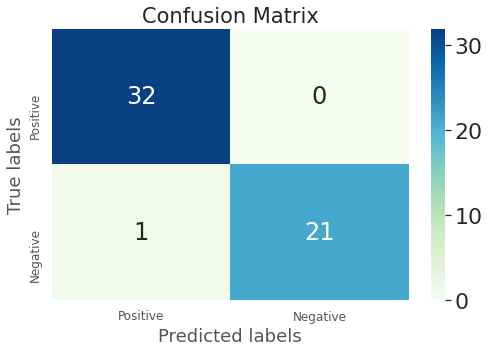

In [0]:
# display confusion matrix

f, ax = plt.subplots(figsize=(8,5))

sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, ax=ax, fmt="g", cmap = "GnBu");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.xaxis.set_ticklabels(['Positive', 'Negative']);
ax.yaxis.set_ticklabels(['Positive', 'Negative']);
plt.show()

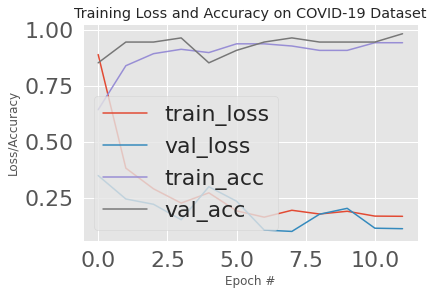

In [0]:
# plot losses and accuracy

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

**SAVE MODEL**

**Don't run!**

In [0]:

# save model to disk (h5)
print("[INFO] saving COVID-19 detector model...")
model.save("covid19.model", save_format="h5")
# JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Saved model to disk")

[INFO] saving COVID-19 detector model...
Saved model to disk


In [0]:
!nvidia-smi

Tue May 19 06:26:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    82W / 149W |  10868MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# **LOAD MODEL**

**RUN FROM THIS**

In [0]:
# Model reconstruction from JSON file
from tensorflow.keras.models import model_from_json, load_model
with open('/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/model.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/covid19.model')
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
    
#load dataset SUDAH

In [0]:
# initialize learning rate, epochs, and batch size
# (This value are from the result of optimization using GridSearchCV )
INIT_LR = 0.008
EPOCHS = 12
BS = 7

In [0]:
model.summary()

Model: "model_294"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0 

In [0]:
# predict data test
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
#print(predIdxs)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       0.97      1.00      0.98        32
      normal       1.00      0.95      0.98        22

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [0]:
# compute the confusion matrix, accuracy, sensitivity, and specificity

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[32  0]
 [ 1 21]]
acc: 0.9815
sensitivity: 1.0000
specificity: 0.9545


# 11. Implementasi Model

Pada bagian ini, akan dilakukan proses validasi atas model machine learning yang telah dibuat untuk memprediksi data baru.

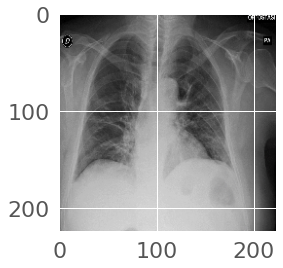

In [0]:
# Load Images from drive
testimg = cv2.imread("/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/validasi/test2.jpeg",cv2.IMREAD_COLOR)
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)
#testimg = cv2.bitwise_not(testimg)
testimg = cv2.resize(testimg, (224, 224))
testimg = np.array(testimg) / 255.0
plt.imshow(testimg)

In [0]:
# convert the image pixels to a numpy array
image = img_to_array(testimg)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# predict the probability across all output classes
yhat = model.predict(image)
#print(yhat)
if (yhat[0][0] >= yhat[0][1]) :
  print("Hasil : POSITIF COVID")
  print("Probability : {:.2f} % ".format(yhat[0][0]*100))
else :
  print("Hasil : NORMAL")
  print("Probability : {:.2f} %".format(yhat[0][1]*100))

Hasil : POSITIF COVID
Probability : 99.18 % 


## TUGAS BESAR 1

Lakukan ulang metode di atas untuk jumlah data training dan testing yang lebih banyak. Anda diperbolehkan untuk menggunakan data sebanyak-banyaknya (tidak terbatas pada data yang diberikan), mengganti metode augmentasi, melakukan tuning hyperparameter, mengganti arsitektur, menggunakan pretrained model lain, dan menentukan performance metric yang menurut anda baik.

Pada folder tugas besar terdapat tiga folder dataset, berikut penjelasan untuk masing-masing folder.

*   sample_dataset: merupakan hasil sampling dari Dr Cohen's Dataset, berisi 25 data x-ray normal dan 25 data x-ray Covid-19.
*   sansten_dataset: merupakan data hasil sampling dari Dr Cohen's Dataset, berisi 102 data x-ray normal, 102 data x-ray bacterial pneumonia, dan 95 data Covid-19.
*   chestimaging_dataset: merupakan data 51 kasus Covid-19, jumlah gambar setiap kasus beragam.

Tidak semua dataset bersih dan dapat langsung digunakan, pastikan untuk mengecek satu-persatu dataset sebelum melakukan training. Misalnya pada dataset yang diberikan terdapat x-ray yang diambil dari penampang lain, terdapat hasil ct scan, dll. Penggunaan dataset yang tidak teratur dapat menurunkan performa model.



Referensi:

Dataset
*   Dr Cohen's Dataset: https://github.com/ieee8023/covid-chestxray-dataset
*   Audrey's Dataset: https://github.com/agchung/Figure1-COVID-chestxray-dataset
*   Kaggle NIH Dataset: https://www.kaggle.com/nih-chest-xrays/data
*   @ChestImaging's Dataset: https://twitter.com/i/status/1243928581983670272
*   COVIDx Dataset: https://github.com/lindawangg/COVID-Net/blob/master/docs/COVIDx.md

Github
*   COVID-Net: https://github.com/lindawangg/COVID-Net

Tutorial (source code tugas ini)
*   https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/





**GRID SEARCH METHOD**

Apabila ingin mengekseksekusi sel lain setelah mengeksekusi block sel grid search ini, diharuskan melakukan eksekusi dari bagian "Model Definition" bagian 6 untuk membuat model keras (model yang dibuat pada bagian GridSearch yaitu KerasClassifier untuk menjalankan library skykit learn)

In [0]:
# GRID SEARCH FUNCTION

def create_network(INIT_LR = 2e-2,epochs = 10 ,opti = 'Adam'):
  baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

  # construct the new head of the model
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dropout(0.5)(headModel)
  headModel = Dense(2, activation="softmax")(headModel)

  # place the new head model on top of the base model
  model = Model(inputs=baseModel.input, outputs=headModel)

  # freeze the base model
  for layer in baseModel.layers:
    layer.trainable = False
  if (opti == 'Adam') :
    opt = Adam(lr=INIT_LR, decay=INIT_LR / epochs)
  elif(opti == 'SGD') :
    opt = SGD(lr=INIT_LR, decay=INIT_LR / epochs)
  else :
    opt = RMSprop(lr=INIT_LR, decay=INIT_LR / EPOCHS)
  model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])
  return model

# Create sklearn model
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_network, verbose = 0)

In [0]:
# Coarse Tuning

optimizers = ['Adam']
learningrate = [0.001, 0.02, 0.1]   
batchsize = [5,10,15]                          # Diambil dari Coarse Tuning. Will be optimized again next tune
epochs = [10]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size=batchsize,epochs=epochs, INIT_LR=learningrate,opti = optimizers)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_results = grid.fit(data, labels)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.8501747012138366, using {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.8350104808807373 (0.13326081145148522) with: {'INIT_LR': 0.001, 'batch_size': 5, 'epochs': 10, 'opti': 'Adam'}
0.8278826117515564 (0.15507166911153816) with: {'INIT_LR': 0.001, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.8123689770698548 (0.1353460319020693) with: {'INIT_LR': 0.001, 'batch_size': 15, 'epochs': 10, 'opti': 'Adam'}
0.8009084701538086 (0.13608229407892677) with: {'INIT_LR': 0.02, 'batch_size': 5, 'epochs': 10, 'opti': 'Adam'}
0.8501747012138366 (0.1484054389753976) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.6726065784692764 (0.34143801395765117) with: {'INIT_LR': 0.02, 'batch_size': 15, 'epochs': 10, 'opti': 'Adam'}
0.19622641801834106 (0.39245283603668213) with: {'INIT_LR': 0.1, 'batch_size': 5, 'epochs': 10, 'opti': 'Adam'}
0.13207546770572662 (0.2548217732567237) with: {'INIT_LR': 0.1, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0

In [0]:
# Fine Tuning LR
optimizers = ['Adam']
learningrate = [0.008, 0.02, 0.04]   
batchsize = [10]                          # Diambil dari Coarse Tuning. Will be optimized again next tune
epochs = [10]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size=batchsize,epochs=epochs, INIT_LR=learningrate,opti = optimizers)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_results = grid.fit(data, labels)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.9170510292053222, using {'INIT_LR': 0.008, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.9170510292053222 (0.05291516342185715) with: {'INIT_LR': 0.008, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.905870008468628 (0.0707105273633731) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.5547169804573059 (0.4604082881546126) with: {'INIT_LR': 0.04, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}


In [0]:
# Tuning Optimizers

optimizers = ['Adam', 'SGD', 'RMSprop']
learningrate = [0.02]
batchsize = [10]
epochs = [10]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size=batchsize,epochs=epochs, INIT_LR=learningrate,opti = optimizers)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_results = grid.fit(data, labels)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.8876310348510742, using {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.8876310348510742 (0.08904895017484625) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.6879105508327484 (0.30722008332494627) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'SGD'}
0.6943396210670472 (0.3856448695442646) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'RMSprop'}


In [0]:
# Fine Batch Size Tuning 

optimizers = ['Adam']
learningrate = [0.02]
batchsize = [5,7,10,12]
epochs = [10]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size=batchsize,epochs=epochs, INIT_LR=learningrate,opti = optimizers)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_results = grid.fit(data, labels)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.932145357131958, using {'INIT_LR': 0.02, 'batch_size': 7, 'epochs': 10, 'opti': 'Adam'}
0.6990915417671204 (0.3649947039121264) with: {'INIT_LR': 0.02, 'batch_size': 5, 'epochs': 10, 'opti': 'Adam'}
0.932145357131958 (0.0660628278129808) with: {'INIT_LR': 0.02, 'batch_size': 7, 'epochs': 10, 'opti': 'Adam'}
0.8719077587127686 (0.09517542117335681) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.8830887675285339 (0.10572534381912121) with: {'INIT_LR': 0.02, 'batch_size': 12, 'epochs': 10, 'opti': 'Adam'}


In [0]:
# Fine EPOCHS Tuning 

optimizers = ['Adam']
learningrate = [0.02]
batchsize = [10]
epochs = [5,7,10,12]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size=batchsize,epochs=epochs, INIT_LR=learningrate,opti = optimizers)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_results = grid.fit(data, labels)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.884136974811554, using {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 12, 'opti': 'Adam'}
0.8275331974029541 (0.10701311814271167) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 5, 'opti': 'Adam'}
0.7489168405532837 (0.1718184879826354) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 7, 'opti': 'Adam'}
0.835080373287201 (0.10759800492567591) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 10, 'opti': 'Adam'}
0.884136974811554 (0.11478860290959854) with: {'INIT_LR': 0.02, 'batch_size': 10, 'epochs': 12, 'opti': 'Adam'}


## TUGAS BESAR 2 (Opsional)

Class Activation Map (CAM) adalah explanation method untuk melihat perilaku dari suatu model. CAM mengambil fitur hasil ekstraksi dari convolution layer dan memvisualisasikan gradien yang didapat dalam bentuk heatmap. Daerah dengan intensitas heatmap tinggi menunjukkan bahwa pada bagian memiliki confidence level yang tinggi untuk diklasifikasikan ke kelas yang bersangkutan. Jika hasil evaluasi menunjukkan akurasi yang bagus, namun heatmap dari CAM menunjukkan lokasi yang salah, berarti model mempelajari fitur yang salah.

Gunakan Class Activation Map atau explanation method lainnya pada model Covid-19, kemudian analisis perilaku model. 


Referensi:

Paper
*   https://arxiv.org/abs/1610.02391

Github
*   https://github.com/insikk/Grad-CAM-tensorflow

Tutorial
*   https://www.pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import argparse
import imutils
import cv2

In [0]:
class GradCAM:
	def __init__(self, model, classIdx, layerName=None):
		# store the model, the class index used to measure the class
		# activation map, and the layer to be used when visualizing
		# the class activation map
		self.model = model
		self.classIdx = classIdx
		self.layerName = layerName

		# if the layer name is None, attempt to automatically find
		# the target output layer
		if self.layerName is None:
			self.layerName = self.find_target_layer()

	def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name

		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

	def compute_heatmap(self, image, eps=1e-8):
		# construct our gradient model by supplying (1) the inputs
		# to our pre-trained model, (2) the output of the (presumably)
		# final 4D layer in the network, and (3) the output of the
		# softmax activations from the model
		gradModel = Model(
			inputs=[self.model.inputs],
			outputs=[self.model.get_layer(self.layerName).output, 
				self.model.output])

		# record operations for automatic differentiation
		with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
			inputs = tf.cast(image, tf.float32)
			(convOutputs, predictions) = gradModel(inputs)
			loss = predictions[:, self.classIdx]

		# use automatic differentiation to compute the gradients
		grads = tape.gradient(loss, convOutputs)
		grads = tf.math.truediv(
			tf.math.subtract(
				grads,
				tf.math.reduce_min(grads)
			),
			tf.math.subtract(
				tf.math.reduce_max(grads),
				tf.math.reduce_min(grads)
			)
		)

		# compute the guided gradients
		castConvOutputs = tf.cast(convOutputs > 0, "float32")
		castGrads = tf.cast(grads > 0, "float32")
		guidedGrads = castConvOutputs * castGrads * grads

		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
		convOutputs = convOutputs[0]
		guidedGrads = guidedGrads[0]

		# compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
		weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
		cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

		# grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
		(w, h) = (image.shape[2], image.shape[1])
		heatmap = cv2.resize(cam.numpy(), (w, h))

		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
		numer = heatmap - np.min(heatmap)
		denom = (heatmap.max() - heatmap.min()) + eps
		heatmap = numer / denom
		heatmap = (heatmap * 255).astype("uint8")

		# return the resulting heatmap to the calling function
		return heatmap

	def overlay_heatmap(self, heatmap, image, alpha=0.5, colormap=cv2.COLORMAP_VIRIDIS):
		# apply the supplied color map to the heatmap and then
		# overlay the heatmap on the input image
		heatmap = cv2.applyColorMap(heatmap, colormap)
		output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

		# return a 2-tuple of the color mapped heatmap and the output,
		# overlaid image
		return (heatmap, output)

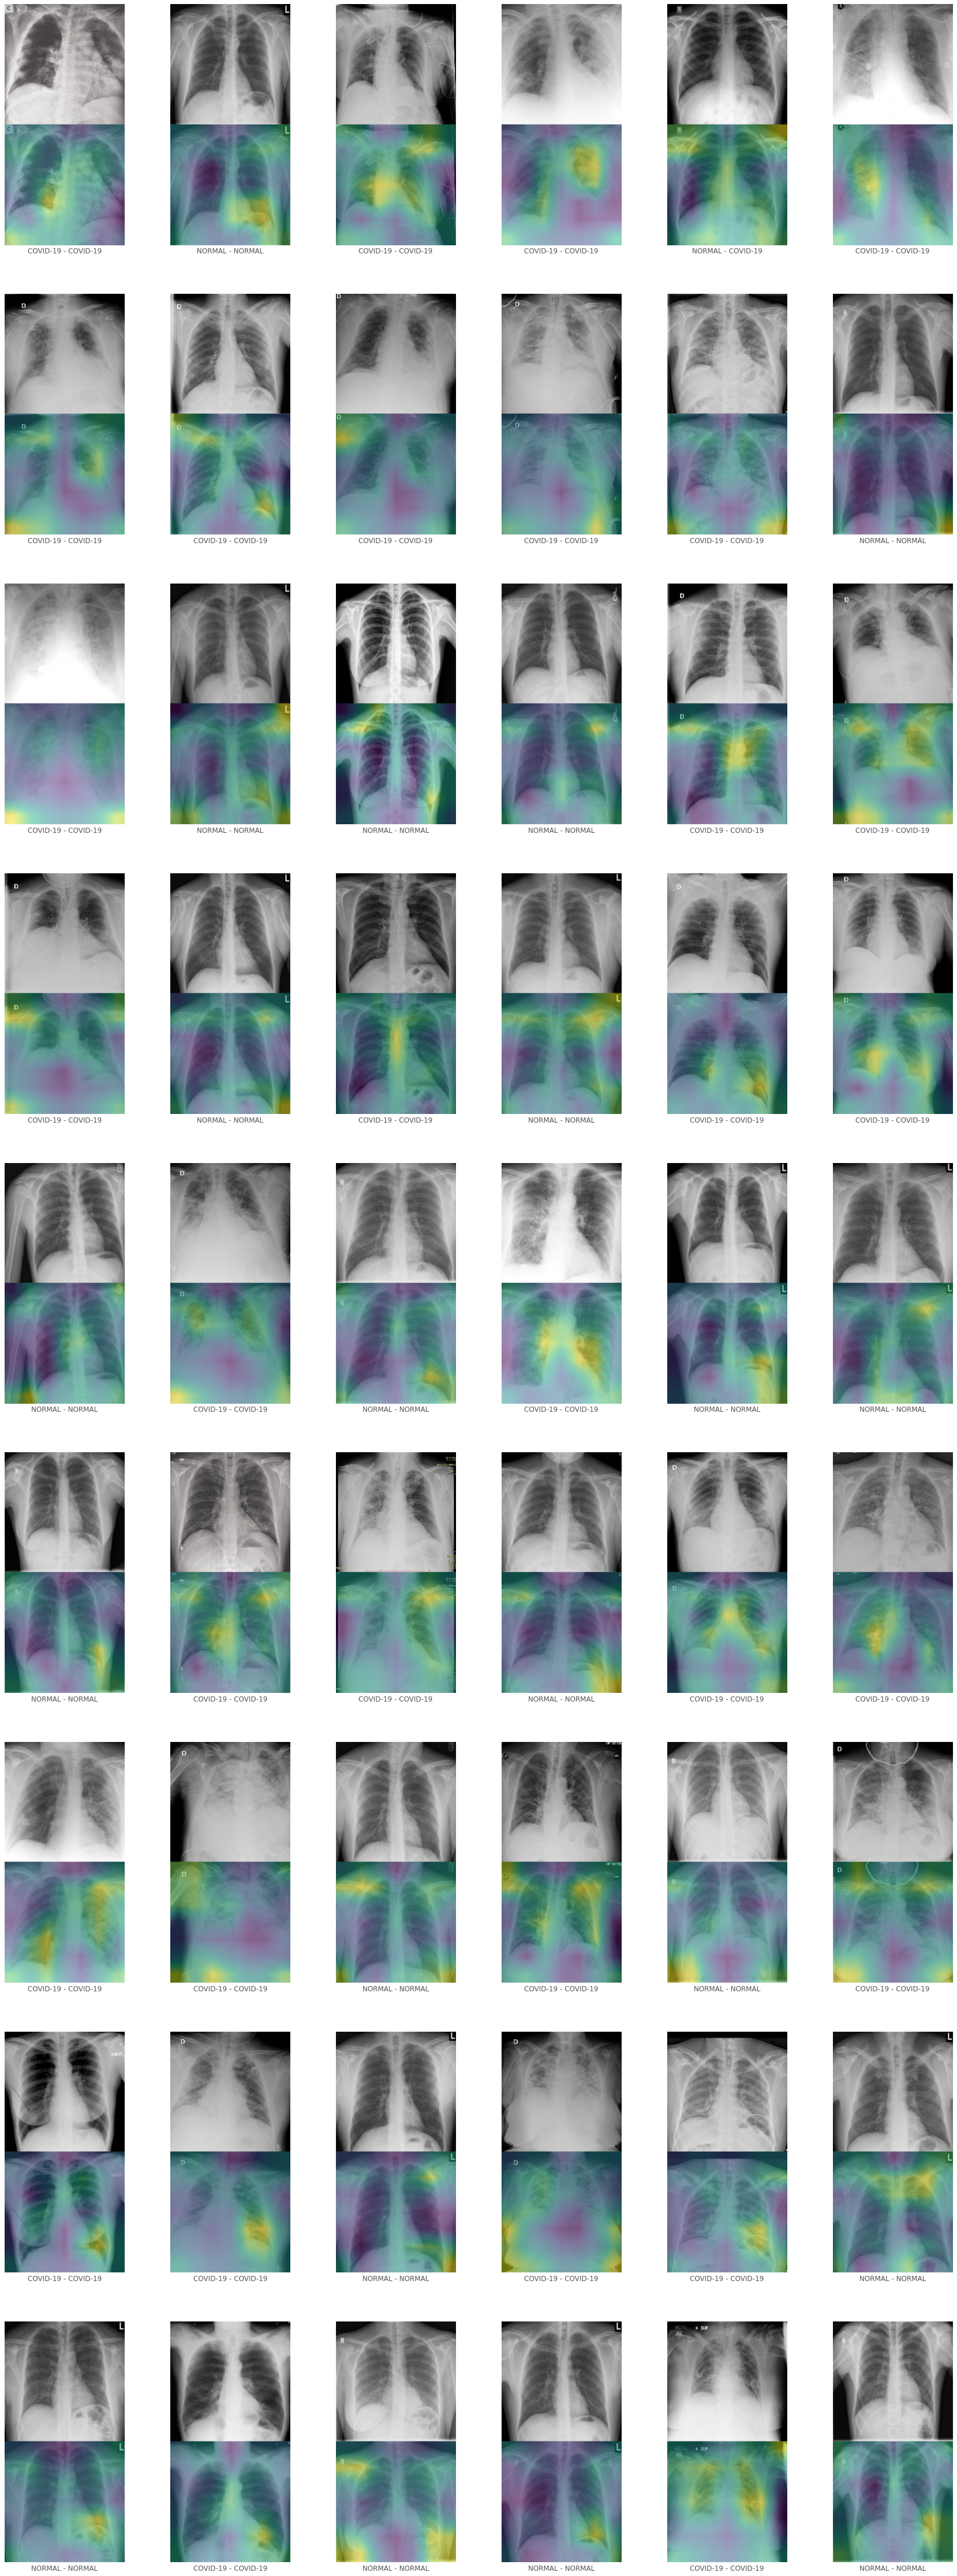

In [0]:
plt.figure(figsize=(30,100))
for i in range(len(testX)):
  plt.subplot(11, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  orig = testX[i]
  orig_image = 255 * orig
  orig_image = orig_image.astype(np.uint8)

  image = np.expand_dims(orig, axis=0)

  # use the network to make predictions on the input image and find
  # the class label index with the largest corresponding probability
  preds = model.predict(image)
  idx = np.argmax(preds[0])

  # initialize our gradient class activation map and build the heatmap
  cam = GradCAM(model, idx, "block5_pool")
  heatmap = cam.compute_heatmap(image)

  # resize the resulting heatmap to the original input image dimensions
  # and then overlay heatmap on top of the image
  heatmap = cv2.resize(heatmap, (orig_image.shape[1], orig_image.shape[0]))
  (heatmap, output) = cam.overlay_heatmap(heatmap, orig_image, alpha=0.5)

  from google.colab.patches import cv2_imshow

  # display the original image and resulting heatmap and output image to our screen
  output = np.vstack([orig_image, output])
  output = imutils.resize(output, height=700)

  plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

  if (testY[i][0] >= testY[i][1]):
    label = "COVID-19"
  else:
    label = "NORMAL"

  if (preds[0][0] >= preds[0][1]) :
    string = label + " - COVID-19"
    plt.xlabel(string)
  else :
    string = label + " - NORMAL"
    plt.xlabel(string)
plt.show()